Повертаючись до розмов про __проблеми__ та __алгоритми__, ми можемо згадати наш приклад для проблеми __пошуку__. Для правильного аналізу задачі ми маємо оцінювати:

* найгіршу складність вирішення __проблеми теоретично__ та __певним алгоритмом__
* найкращу теоретично можливу складність вирішення __проблеми теоретично__ та __певним алгоритмом__
* середній випадок вирішення проблеми __певним алгоритмом__

In [68]:
lst = list(range(10))

In [69]:
def linear_search(arr, target):
    """Best case O(1)
       Worst case O(n)
       Average O(n)"""
    for index, element in enumerate(arr):
        if element == target:
            return index
    return None


In [70]:
def binary_search(arr, target):
    """Best case O(1)
       Worst case O(log(n))
       Average O(log(n))"""
    left = 0
    right = len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return None


Насправді, треба зазначити, що ці два алгоритми вирішують трошки різні проблеми. Лінійний пошук працює навіть з __невідсортованими__ списками. Тоді як бінарний пошук працює тільки коли масив __відсортований__. Також бінарний пошук чутливий до ситуацій, коли ви шукаєте величину, що знаходиться на краю колекції. Лінійний пошук чутливий до ситуацій, коли величина в кінці колекції.

Подробно можна почитати [тут](https://www.freecodecamp.org/news/search-algorithms-linear-and-binary-search-explained/). Окремо зверніть увагу на order agnostic binary search. Сортування все ще важливо; але ми можемо не переживати за його __порядок__

Задача пошуку ми навряд уже покращимо. Але ми можемо вирішити схожу задачу: нехай нам треба не повернути __індекс входження__, а перевірити сам __факт наявності__ елементу в колекції. 

Спойлер: ми можемо це зробити за (майже) О(1) часу.

In [71]:
st = set(range(10))
# до речі, якою буде складність створення цієї множини? 
# Якою буде складність перетворення множини зі списку та назад?

In [72]:
def linear_search_modified(arr, target):
    """Best case O(1)
       Worst case O(n)
       Average O(n)"""
    for element in arr:
        if element == target:
            return True
    return False


def binary_search_modified(arr, target):
    """Best case O(1)
       Worst case O(log(n))
       Average O(log(n))"""
    left = 0
    right = len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return True
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False


In [73]:
from random import randint

In [74]:
#Протестуйте як для 20, так і для 200000 і вище

NUMS = 2000000

lst = list(range(NUMS))
st = set(range(NUMS))

In [75]:
%%timeit

linear_search_modified(lst, randint(0, NUMS))

89.3 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
%%timeit

binary_search_modified(lst, randint(0, NUMS))

14.6 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [77]:
%%timeit

randint(0, NUMS) in st

4.06 µs ± 35.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [78]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable

RANGE_BOUND_MAX = 1500
TESTS_NUM = 5000

def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

range_bounds = list(range(10, RANGE_BOUND_MAX))

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = type_constr(range(range_bound))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr, 
                target = random.randint(0, range_bound))
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

linear_times: List[float] = time_algs_by_mean(linear_search_modified, TESTS_NUM, range_bounds)

binary_times: List[float] = time_algs_by_mean(binary_search_modified, TESTS_NUM, range_bounds)

set_times: List[float] = time_algs_by_mean(lambda arr, target: target in arr, TESTS_NUM, range_bounds, set)

In [79]:
import matplotlib.pyplot as plt

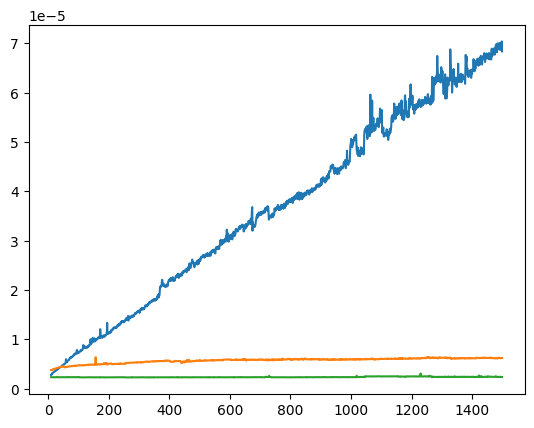

In [80]:
plt.plot(range_bounds, linear_times)
plt.plot(range_bounds, binary_times)
plt.plot(range_bounds, set_times)

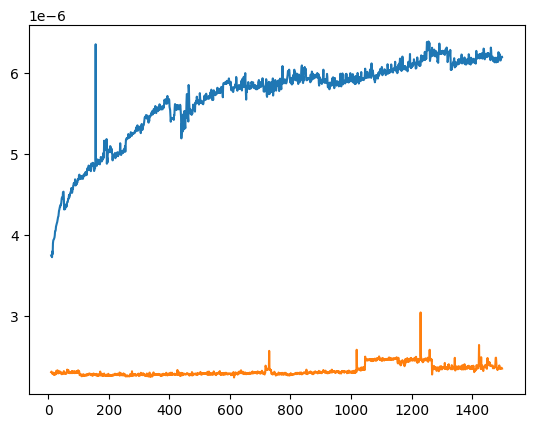

In [81]:
plt.plot(range_bounds, binary_times)
plt.plot(range_bounds, set_times)

За рахунок чого це відбувається? Все тому що set в Python працює на основі структури даних, що носить назву hash table [(ось таблиця її асимптотичної складності)](https://iq.opengenus.org/time-complexity-of-hash-table/). Як ми бачимо, це вражаючі показники: майже всі операції працюють за О(1). Вочевидь, за таку швидкість доводиться платити. Та і подібна асимптотична складність алгоритму є трохи ідеалізованою. 
Давайте розберемо це поглянувши на нативні реалізації хеш-таблиці в Python:

In [82]:
native_hash_table = {
    "key_1": 1,
    "key_2": 2,
}

In [83]:
yet_another_set = set(range(10))

Виходячи з відомих властивостей словників і множин у Python, ми платимо:
* Порядком (віднедавна словники у Python гарантують порядок, але в тому числі in the sake of readability є сенс використовувати ordered dict коли вам потрібно зберігати порядок ключів)
* Обов'язковою унікальністю кожного елементу (в множині не буває дублікатів)
* Необхідністю мати для кожного ключа **"гарний"** хеш. 

Але що таке **"гарний"** хеш? І які обмеження він у свою чергу накладає на дані?

За визначенням, хеш-функція - це функція, котра різним об'єктам **однозначно** ставить у відповідність певне **ціле** число. Ця **однозначність** тягне за собою вимогу до **незмінності** хешуємого об'єкту. 

In [84]:
print(hash(1284))
print(hash(1010.1828))
print(hash("hash"))

1284
421508102084363250
-7422326810098710744


Важлива властивість хеш-функції: для неї не існує зворотнього перетворення (окрім повного перебору пар об'єкт-хеш). Ви не можете застосувати якусь іншу функцію на хеш для того щоб відновити об'єкт.
Ця властивість активно використовується у криптографії (наприклад, для збереження паролів).

Для своїх типів даних ми можемо визначити dunder-метод \__hash\__. Також, одне з використання хешу може бути порівняння об'єктів. Якщо в об'єктів один хеш, ми вважаємо їх рівними.

Загалом, в Python є чітка конвенція по перевизначенню методів \__eq\__ i \__hash\__, [посилання на документацію](https://docs.python.org/3/reference/datamodel.html#object.__hash__)

In [85]:
from dataclasses import dataclass

@dataclass
class MyShinyClass:
    member_1: int
    member_2: int

    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __hash__(self):
        return hash(self.member_1 + self.member_2)

Окрім як в імплементаціях асоціативного масиву, хеш-функції активно використовуються в криптографії та збереженні паролів. Бібліотека hashlib у Python надає для користування низку різних хешів, більшість з котрих використовують псевдо-випадкові числа в своїй роботі.

In [86]:
import hashlib

value = """Завершенням національно-визвольної революції має бути відбудова і закріплення Самостійної Соборної Української держави.
   Передумовою для відновлення самостійного державного життя є знищення на Українських Землях совєтської влади, 
   її органів і силових інструментів, знищення комуністичної партії і системи, усунення з України всіх сил, 
   які захищають російський імперіялізм і протиставляться самостійницьким змаганням."""

encoded_stepan_andriyovych_bandera_quote = bytes(value, encoding="utf-8")

hash_1 = hashlib.md5(encoded_stepan_andriyovych_bandera_quote)
print(hash_1.hexdigest())

hash_2 = hashlib.blake2b(encoded_stepan_andriyovych_bandera_quote)
print(hash_2.hexdigest())

hash_3 = hashlib.sha256(encoded_stepan_andriyovych_bandera_quote)
print(int(hash_3.hexdigest(), 16))

14b3ca85c016d55652f18e96ee418102
e6e7f681871c36710a67db771ef5547ce3bf2adb566eeac2f767f4dcc9ad754385bae14d1bb2d598968c84fcd18f1af4792b789c8f7aacf5a9f173b5f0cf2b07
14829960064972961791553133400779490158879434977584872404453915472927260681993


Тобто, ми маємо спосіб поставити якесь **ціле число** певному об'єкту, що відповідає заявленим умовам. Отже, ми можемо використовувати значення хеш-функції як **індекс** списку та складати об'єкти з відповідним хешом у елемент цього списку за цим індексом.

Власне, в цьому і полягає ідея асоціативного масиву (чи хеш-таблиці. [Брайан Керніган каже](https://youtu.be/qTZJLJ3Gm6Q), що це, по суті, те саме, а я і не сперечаюсь.)

In [87]:
class HashTable:
    """Ілюстративна реалізація хеш-таблиці. 
    В якості способу розв'язання колізій використовується chaining.
    Ця реалізація не є оптимальною, але дозволяє зрозуміти принципи роботи хеш-таблиць.
    В реальних програмах використовуйте dict"""
    def __init__(self, load_factor):
        """В цьому методі ми імітуємо роботу асоціативного масиву в мовах 
        де треба вручну виділяти пам'ять під списки та масиви. 
        Для того щоб не аллокувати забагато пам'яті, вводиться поняття load_factor'у, 
        котре обмежує розмір списку та максимальне значення хешу"""
        self.load_factor = load_factor
        # Через обмеження на максимальне значення хешу виникає проблема коллізій (коли в різних об'єктів один хеш).
        # З колізіями можна боротися різними способами, тут використаний так званий chainin. 
        # Для кожного ключа ми зберігаємо не об'єкт, а список об'єктів. 
        # Тому доступ за ключем може бути О(n) в найгіршому випадку замість О(1) в ідеалізованому
        self.table = [list() for _ in range(load_factor)] 

    def _hash(self, key):
        """Ця імплементація хешу обмежує його максимальне значення згідно заданого load_factor"""
        return hash(key) % self.load_factor

    def insert(self, key, value):
        """В цій імплементації ми зберігаємо для кожного хешу пару ключ-значення, 
        щоб ми могли в майбутньому здобути значення саме для цього ключа 
        навіть у випадку якщо хеш ключів однаковий"""
        index = self._hash(key)
        for item in self.table[index]:
            if item[0] == key:
                item[1] = value
                return
        self.table[index].append((key, value))

    def get(self, key):
        index = self._hash(key)
        for item in self.table[index]:
            if item[0] == key:
                return item[1]
        raise KeyError(key)

    def remove(self, key):
        index = self._hash(key)
        for i, item in enumerate(self.table[index]):
            if item[0] == key:
                del self.table[index][i]
                return
        raise KeyError(key)

In [88]:
d = HashTable(100)

In [89]:
d.insert(1, 1)

In [90]:
d.get(1)

1

In [91]:
d.insert(101, 4)

In [92]:
d.get(101)

4

Через низку причин (як-то необхідність на фізичному рівні аллокувати пам'ять заздалегідь під асоціативний масив) ми далеко не завжди зацікавлені в тому, щоб хеш-функція для кожного окремого об'єкта робила різні хеші. Тобто, коллізії в хеш-таблиці - це нормальна ситуація, закладена в дизайн. Але алгоритми вирішення коллізій мають свою ціну. Як у випадку chaining ми платимо швидкістю доступу та швидкістю видалення.

Також треба розуміти, що, незважаючи на те, що колізії - це нормально, це не значить, що їх не треба уникати. Хеш-функцій існує велика множина, і найкраща хеш-функція це та, котра створює найменшу кількість колізій. 